In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.decomposition as sd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/World University Rankings.csv')
df

,name,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,record_type,member_level,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,subjects_offered,closed,unaccredited,overall_score
0,University of Oxford,96.6,100.0,99.0,98.7,97.5,master_account,0,United Kingdom,"21,750",10.9,42%,49:51:00,"Geography,Chemistry,Chemical Engineering,Biolo...",False,False,98.5
1,Stanford University,99.0,97.8,99.6,100.0,87.0,private,0,United States,"14,517",6.4,23%,47:53:00,"Computer Science,Communication & Media Studies...",False,False,98
2,Massachusetts Institute of Technology,98.6,96.2,99.7,100.0,93.8,private,0,United States,"11,085",8.0,33%,41:59:00,"Architecture,Economics & Econometrics,Archaeol...",False,False,97.9
3,Harvard University,97.7,99.9,99.4,84.2,90.8,private,0,United States,"20,050",9.0,25%,51:49:00,"Sociology,Architecture,Physics & Astronomy,Psy...",False,False,97.8
4,University of Cambridge,95.8,100.0,98.0,87.9,97.4,master_account,0,United Kingdom,"20,565",11.5,38%,48:52:00,Politics & International Studies (incl Develop...,False,False,97.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668,Zarqa University,NaN,NaN,NaN,NaN,NaN,master_account,0,Jordan,"5,881",17.0,35%,60:40:00,"General Engineering,Civil Engineering,Electric...",False,False,NaN
2669,Zhetysu University,NaN,NaN,NaN,NaN,NaN,master_account,0,Kazakhstan,"4,872",18.2,0%,66:34:00,"History, Philosophy & Theology,Psychology,Lang...",False,False,NaN
2670,Zhytomyr Polytechnic State University,NaN,NaN,NaN,NaN,NaN,master_account,0,Ukraine,"4,454",16.1,1%,40 : 60,"Law,Economics & Econometrics,Politics & Intern...",False,False,NaN
2671,Ziane Achour University of Djelfa,NaN,NaN,NaN,NaN,NaN,master_account,0,Algeria,"31,103",28.5,0%,55:45:00,"Architecture,Agriculture & Forestry,Biological...",False,False,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2673 entries, 0 to 2672
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          2673 non-null   object 
 1   scores_teaching               1904 non-null   float64
 2   scores_research               1904 non-null   float64
 3   scores_citations              1904 non-null   float64
 4   scores_industry_income        1904 non-null   float64
 5   scores_international_outlook  1904 non-null   float64
 6   record_type                   2673 non-null   object 
 7   member_level                  2673 non-null   int64  
 8   location                      2673 non-null   object 
 9   stats_number_students         2673 non-null   object 
 10  stats_student_staff_ratio     2673 non-null   float64
 11  stats_pc_intl_students        2673 non-null   object 
 12  stats_female_male_ratio       2580 non-null   object 
 13  sub

In [ ]:
df=df.dropna()
df

,name,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,record_type,member_level,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,subjects_offered,closed,unaccredited,overall_score
0,University of Oxford,96.6,100.0,99.0,98.7,97.5,master_account,0,United Kingdom,"21,750",10.9,42%,49:51:00,"Geography,Chemistry,Chemical Engineering,Biolo...",False,False,98.5
1,Stanford University,99.0,97.8,99.6,100.0,87.0,private,0,United States,"14,517",6.4,23%,47:53:00,"Computer Science,Communication & Media Studies...",False,False,98
2,Massachusetts Institute of Technology,98.6,96.2,99.7,100.0,93.8,private,0,United States,"11,085",8.0,33%,41:59:00,"Architecture,Economics & Econometrics,Archaeol...",False,False,97.9
3,Harvard University,97.7,99.9,99.4,84.2,90.8,private,0,United States,"20,050",9.0,25%,51:49:00,"Sociology,Architecture,Physics & Astronomy,Psy...",False,False,97.8
4,University of Cambridge,95.8,100.0,98.0,87.9,97.4,master_account,0,United Kingdom,"20,565",11.5,38%,48:52:00,Politics & International Studies (incl Develop...,False,False,97.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,Yanshan University,19.5,11.7,34.5,36.0,20.4,master_account,0,China,"39,191",13.4,1%,39 : 61,"Languages, Literature & Linguistics,Mathematic...",False,False,9.7–22.7
1900,Yeditepe University,22.0,12.4,17.6,59.3,38.8,master_account,0,Turkey,"17,378",27.5,6%,55:45:00,"Mechanical & Aerospace Engineering,Economics &...",False,False,9.7–22.7
1901,Yerevan State University,23.9,8.6,26.8,16.4,38.1,master_account,0,Armenia,"13,838",8.0,2%,53:47:00,"History, Philosophy & Theology,Business & Mana...",False,False,9.7–22.7
1902,Yogyakarta State University,16.9,10.5,28.8,23.1,30.6,master_account,0,Indonesia,"24,073",16.3,1%,61:39:00,"Mathematics & Statistics,General Engineering,C...",False,False,9.7–22.7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1827 entries, 0 to 1903
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          1827 non-null   object 
 1   scores_teaching               1827 non-null   float64
 2   scores_research               1827 non-null   float64
 3   scores_citations              1827 non-null   float64
 4   scores_industry_income        1827 non-null   float64
 5   scores_international_outlook  1827 non-null   float64
 6   record_type                   1827 non-null   object 
 7   member_level                  1827 non-null   int64  
 8   location                      1827 non-null   object 
 9   stats_number_students         1827 non-null   object 
 10  stats_student_staff_ratio     1827 non-null   float64
 11  stats_pc_intl_students        1827 non-null   object 
 12  stats_female_male_ratio       1827 non-null   object 
 13  subjects

In [ ]:
df['record_type'] = df['record_type'].map({'master_account': 0, 'private': 1, 'public': 2})
df

/tmp/ipython-input-3564531185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['record_type'] = df['record_type'].map({'master_account': 0, 'private': 1, 'public': 2})


,name,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,record_type,member_level,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,subjects_offered,closed,unaccredited,overall_score
0,University of Oxford,96.6,100.0,99.0,98.7,97.5,0,0,United Kingdom,"21,750",10.9,42%,49:51:00,"Geography,Chemistry,Chemical Engineering,Biolo...",False,False,98.5
1,Stanford University,99.0,97.8,99.6,100.0,87.0,1,0,United States,"14,517",6.4,23%,47:53:00,"Computer Science,Communication & Media Studies...",False,False,98
2,Massachusetts Institute of Technology,98.6,96.2,99.7,100.0,93.8,1,0,United States,"11,085",8.0,33%,41:59:00,"Architecture,Economics & Econometrics,Archaeol...",False,False,97.9
3,Harvard University,97.7,99.9,99.4,84.2,90.8,1,0,United States,"20,050",9.0,25%,51:49:00,"Sociology,Architecture,Physics & Astronomy,Psy...",False,False,97.8
4,University of Cambridge,95.8,100.0,98.0,87.9,97.4,0,0,United Kingdom,"20,565",11.5,38%,48:52:00,Politics & International Studies (incl Develop...,False,False,97.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,Yanshan University,19.5,11.7,34.5,36.0,20.4,0,0,China,"39,191",13.4,1%,39 : 61,"Languages, Literature & Linguistics,Mathematic...",False,False,9.7–22.7
1900,Yeditepe University,22.0,12.4,17.6,59.3,38.8,0,0,Turkey,"17,378",27.5,6%,55:45:00,"Mechanical & Aerospace Engineering,Economics &...",False,False,9.7–22.7
1901,Yerevan State University,23.9,8.6,26.8,16.4,38.1,0,0,Armenia,"13,838",8.0,2%,53:47:00,"History, Philosophy & Theology,Business & Mana...",False,False,9.7–22.7
1902,Yogyakarta State University,16.9,10.5,28.8,23.1,30.6,0,0,Indonesia,"24,073",16.3,1%,61:39:00,"Mathematics & Statistics,General Engineering,C...",False,False,9.7–22.7


In [ ]:
X=df[['scores_teaching','scores_research','scores_citations','scores_industry_income','scores_international_outlook','stats_student_staff_ratio']]
y=df['record_type']

In [ ]:
X

,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,stats_student_staff_ratio
0,96.6,100.0,99.0,98.7,97.5,10.9
1,99.0,97.8,99.6,100.0,87.0,6.4
2,98.6,96.2,99.7,100.0,93.8,8.0
3,97.7,99.9,99.4,84.2,90.8,9.0
4,95.8,100.0,98.0,87.9,97.4,11.5
...,...,...,...,...,...,...
1899,19.5,11.7,34.5,36.0,20.4,13.4
1900,22.0,12.4,17.6,59.3,38.8,27.5
1901,23.9,8.6,26.8,16.4,38.1,8.0
1902,16.9,10.5,28.8,23.1,30.6,16.3


In [ ]:
y

,record_type
0,0
1,1
2,1
3,1
4,0
...,...
1899,0
1900,0
1901,0
1902,0


In [ ]:
pca = sd.PCA(n_components=3) # creat model which means you decide the function ( PCA) and the number of components

X_reduced = pca.fit_transform(X) #Result: X_reduced is the transformed dataset with only 2 features (principal components).

In [ ]:
X_reduced

array([[121.76340141,  16.37597219,  12.39436007],
       [118.21849671,  23.10448084,   5.01487806],
       [120.4706033 ,  18.87699928,   9.59008265],
       ...,
       [-41.54115307,  -3.22442429,   7.00675338],
       [-41.00301396,   1.85186905,  -0.58511908],
       [-33.45536364,  21.622853  ,   1.79913908]])

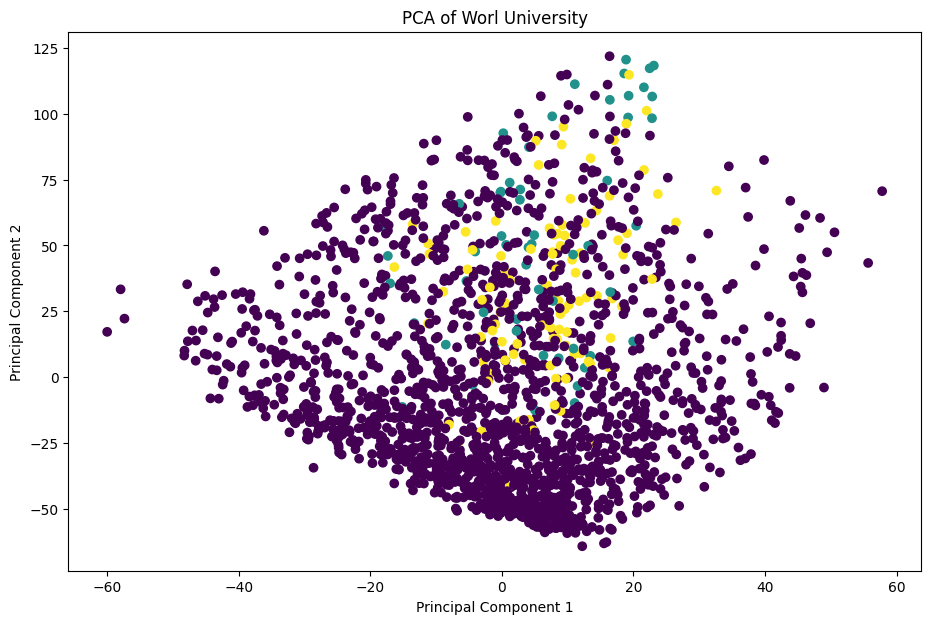

In [ ]:
# Plot the reduced dataset
plt.figure(figsize=(11, 7))
plt.scatter(X_reduced[:, 1], X_reduced[:, 0], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Worl University')
#plt.legend(labels=data.target_names)
plt.show()

In [ ]:
# prompt: make a data frame with x,y and X_reduced

import pandas as pd

# Create a DataFrame with the original data
df = pd.DataFrame(X)

# Add a column for the target variable
df['target'] = y

# Add columns for the reduced data
df['PC1'] = X_reduced[:,0]
df['PC2'] = X_reduced[:, 1]
df['PC3'] = X_reduced[:, 2]

# Print the DataFrame

df

,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,stats_student_staff_ratio,target,PC1,PC2,PC3
0,96.6,100.0,99.0,98.7,97.5,10.9,0,121.763401,16.375972,12.394360
1,99.0,97.8,99.6,100.0,87.0,6.4,1,118.218497,23.104481,5.014878
2,98.6,96.2,99.7,100.0,93.8,8.0,1,120.470603,18.876999,9.590083
3,97.7,99.9,99.4,84.2,90.8,9.0,1,111.162275,11.089647,6.669581
4,95.8,100.0,98.0,87.9,97.4,11.5,0,114.832053,9.880419,12.240979
...,...,...,...,...,...,...,...,...,...,...
1899,19.5,11.7,34.5,36.0,20.4,13.4,0,-33.772311,13.795724,-10.524382
1900,22.0,12.4,17.6,59.3,38.8,27.5,0,-21.162101,25.802482,13.810661
1901,23.9,8.6,26.8,16.4,38.1,8.0,0,-41.541153,-3.224424,7.006753
1902,16.9,10.5,28.8,23.1,30.6,16.3,0,-41.003014,1.851869,-0.585119


In [ ]:
# how to visulaze 3d dataframe

import plotly.express as px

fig = px.scatter_3d(df, x="PC1", y="PC2", z="PC3", color="target")
fig.show()

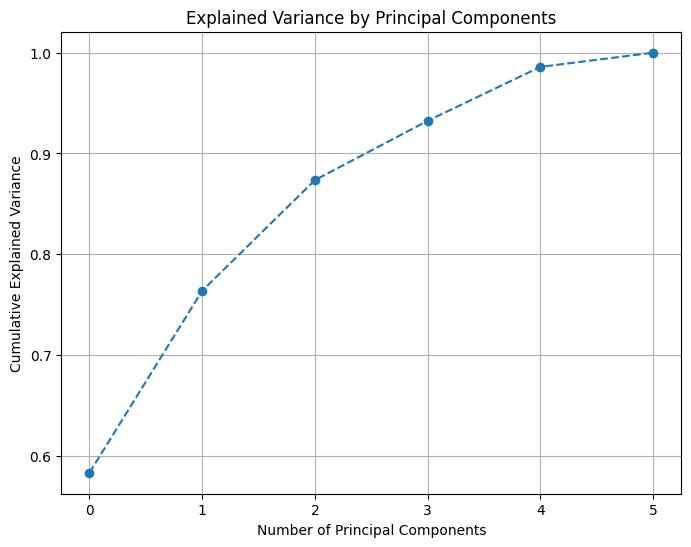

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Standardize the features
scaler = StandardScaler() # define model
X_scaled = scaler.fit_transform(X) # this is the function to show the explanation-power of the new set of the components in comparison to the original number of the variables

pca_full = PCA().fit(X_scaled)
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.show()